# keras cnn model
##### 해당 ai model을 웹에서 서비스 하기위해 tf.js로 변환해야한다. 
##### keras model -> tf.js 변환위해 keras로 구현하였다.

#### module import

In [5]:
# 마지막 결과 보기 위한 tensorboard load
%load_ext tensorboard 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [9]:
import datetime # 시간 다루기 위한 datetime 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt # 시각화 위한 library
plt.style.use('seaborn-white') # style 지정

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Input

#### data load 및 전처리

In [20]:
(x_train, y_train), (x_test, y_test) = load_data() # fashion mnist data load

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

x_train = x_train / 255
x_test = x_test / 255

print(x_train.shape) # 60000개, 28x28의 흑백 image
print(y_train.shape)
print(x_test.shape) # 10000개, 28x28의 흑백 image
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### model 구성 및 컴파일

In [23]:
def build_model():
    model = Sequential()
    
    input = Input(shape=(28, 28, 1))
    output = Conv2D(filters=32, kernel_size=(3, 3))(input)
    output = MaxPool2D(strides=(2, 2))(output)
    output = Conv2D(filters=64, kernel_size=(3, 3))(output)
    output = MaxPool2D(strides=(2, 2))(output)
    output = Conv2D(filters=64, kernel_size=(3, 3))(output)
    output = MaxPool2D(strides=(2, 2))(output)
    output = Flatten()(output)
    output = Dense(units=128, activation='relu')(output)
    output = Dropout(0.3)(output) # overfitting 막기위한 dropout
    output = Dense(units=64, activation='relu')(output)
    output = Dropout(0.3)(output)
    output = Dense(units=10, activation='softmax')(output)
    
    model = Model(inputs=[input], outputs=output)
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
    
    return model

model_1 = build_model()
model_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          3692

#### model 학습

In [27]:
hist_1 = model_1.fit(x_train, y_train, epochs=25, validation_split=0.3, batch_size=128)

Epoch 1/25
329/329 [==============================] - 12s 36ms/step - loss: 0.8777 - acc: 0.6810 - val_loss: 0.5477 - val_acc: 0.7970
Epoch 2/25
329/329 [==============================] - 12s 36ms/step - loss: 0.5720 - acc: 0.7935 - val_loss: 0.4727 - val_acc: 0.8247
Epoch 3/25
329/329 [==============================] - 12s 36ms/step - loss: 0.5000 - acc: 0.8212 - val_loss: 0.4277 - val_acc: 0.8400
Epoch 4/25
329/329 [==============================] - 12s 37ms/step - loss: 0.4442 - acc: 0.8405 - val_loss: 0.3991 - val_acc: 0.8552
Epoch 5/25
329/329 [==============================] - 12s 37ms/step - loss: 0.4094 - acc: 0.8526 - val_loss: 0.3848 - val_acc: 0.8593
Epoch 6/25
329/329 [==============================] - 12s 36ms/step - loss: 0.3835 - acc: 0.8616 - val_loss: 0.3712 - val_acc: 0.8661
Epoch 7/25
329/329 [==============================] - 12s 36ms/step - loss: 0.3588 - acc: 0.8696 - val_loss: 0.3591 - val_acc: 0.8708
Epoch 8/25
329/329 [==============================] - 12s 36ms

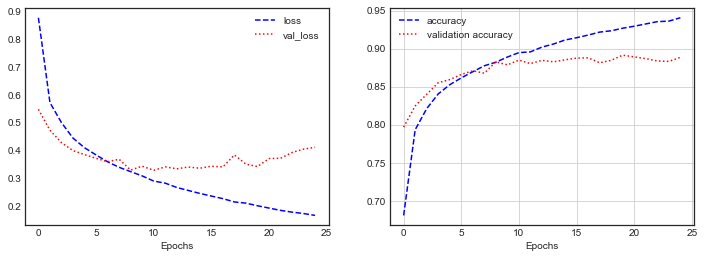

In [28]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(hist_1.history['loss'], 'b--', label='loss')
plt.plot(hist_1.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_1.history['acc'], 'b--', label='accuracy')
plt.plot(hist_1.history['val_acc'], 'r:', label='validation accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [29]:
model_1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4270 - acc: 0.8842


[0.4270341396331787, 0.8841999769210815]

#### 모델 성능 높이기

In [30]:
from tensorflow.keras.layers import BatchNormalization, ReLU

In [35]:
def build_model2():
    model = Sequential()
    
    input = Input(shape=(28, 28, 1))
    output = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(input)
    output = Conv2D(filters=64, kernel_size=3, activation='relu', padding='valid')(output)
    output = MaxPool2D(strides=(2, 2))(output)
    output = Dropout(0.5)(output)
    
    output = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(output)
    output = Conv2D(filters=256, kernel_size=3, activation='relu', padding='valid')(output)
    output = MaxPool2D(strides=(2, 2))(output)
    output = Dropout(0.5)(output)
    
    output = Flatten()(output)
    output = Dense(units=256, activation='relu')(output)
    output = Dropout(0.5)(output)
    output = Dense(units=100, activation='relu')(output)
    output = Dropout(0.5)(output)
    output = Dense(units=10, activation='softmax')(output)
    
    model = Model(inputs=[input], outputs=output)
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
    
    return model

model_2 = build_model2()
model_2.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_25 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 13, 13, 128)       73856     
                                                           

In [36]:
hist_2 = model_2.fit(x_train, y_train, epochs=25, validation_split=0.3, batch_size=128)

Epoch 1/25
329/329 [==============================] - 124s 375ms/step - loss: 0.8650 - acc: 0.6850 - val_loss: 0.4492 - val_acc: 0.8356
Epoch 2/25
329/329 [==============================] - 119s 363ms/step - loss: 0.4898 - acc: 0.8278 - val_loss: 0.3387 - val_acc: 0.8715
Epoch 3/25
329/329 [==============================] - 118s 360ms/step - loss: 0.4029 - acc: 0.8591 - val_loss: 0.3089 - val_acc: 0.8853
Epoch 4/25
329/329 [==============================] - 123s 374ms/step - loss: 0.3598 - acc: 0.8741 - val_loss: 0.2807 - val_acc: 0.8966
Epoch 5/25
329/329 [==============================] - 113s 343ms/step - loss: 0.3327 - acc: 0.8832 - val_loss: 0.2623 - val_acc: 0.9056
Epoch 6/25
329/329 [==============================] - 112s 342ms/step - loss: 0.3115 - acc: 0.8914 - val_loss: 0.2407 - val_acc: 0.9140
Epoch 7/25
329/329 [==============================] - 113s 342ms/step - loss: 0.2947 - acc: 0.8969 - val_loss: 0.2458 - val_acc: 0.9097
Epoch 8/25
329/329 [============================

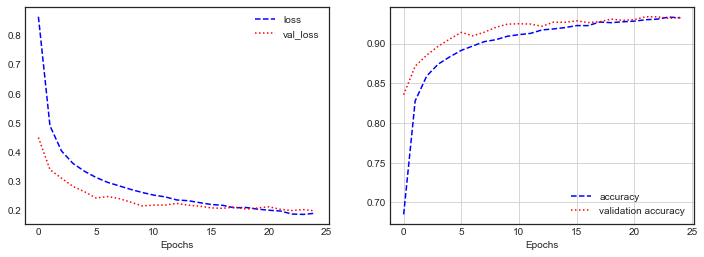

In [37]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(hist_2.history['loss'], 'b--', label='loss')
plt.plot(hist_2.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_2.history['acc'], 'b--', label='accuracy')
plt.plot(hist_2.history['val_acc'], 'r:', label='validation accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [38]:
model_2.evaluate(x_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.2095 - acc: 0.9286


[0.20953571796417236, 0.928600013256073]

#### model 성능 높이기 - 이미지 보강 (image augmentation)

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.2,
    shear_range=0.6,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

In [41]:
augment_size=200

In [42]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)


In [43]:
x_augment = image_generator.flow(np.tile(x_train[0].reshape(28*28*1), augment_size).reshape(-1, 28, 28, 1), np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

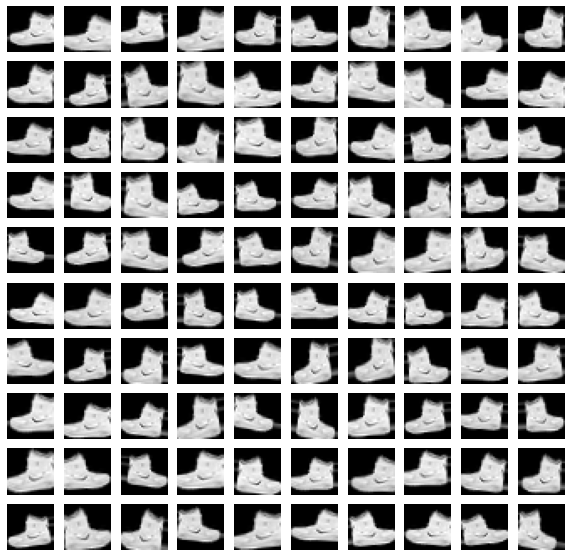

In [45]:
plt.figure(figsize=(10, 10))
for i in range(1, 101):
    plt.subplot(10, 10, i)
    plt.axis('off')
    plt.imshow(x_augment[i-1].reshape(28, 28), cmap='gray')

#### data 추가

In [46]:
image_generator = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    shear_range=0.6,
    width_shift_range=0.15,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

In [47]:
augment_size=30000

In [48]:
random_mask = np.random.randint(x_train.shape[0], size=augment_size)
x_augmented = x_train[random_mask].copy()
y_augmented = y_train[random_mask].copy()

In [49]:
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

x_train = np.concatenate((x_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))

print(x_train.shape)

(90000, 28, 28, 1)


#### model 학습 및 시각화

In [50]:
model_3 = build_model2()
model_3.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_29 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 13, 13, 128)       73856     
                                                           

In [52]:
hist_3 = model_3.fit(x_train, y_train, epochs=25, validation_split=0.3, batch_size=128)

Epoch 1/25
493/493 [==============================] - 188s 381ms/step - loss: 0.8072 - acc: 0.7072 - val_loss: 0.9267 - val_acc: 0.6585
Epoch 2/25
493/493 [==============================] - 180s 365ms/step - loss: 0.4751 - acc: 0.8326 - val_loss: 0.7738 - val_acc: 0.7218
Epoch 3/25
493/493 [==============================] - 179s 364ms/step - loss: 0.4024 - acc: 0.8573 - val_loss: 0.7102 - val_acc: 0.7367
Epoch 4/25
493/493 [==============================] - 178s 360ms/step - loss: 0.3642 - acc: 0.8733 - val_loss: 0.6323 - val_acc: 0.7732
Epoch 5/25
493/493 [==============================] - 173s 350ms/step - loss: 0.3339 - acc: 0.8827 - val_loss: 0.6203 - val_acc: 0.7833
Epoch 6/25
493/493 [==============================] - 180s 364ms/step - loss: 0.3164 - acc: 0.8873 - val_loss: 0.5600 - val_acc: 0.7935
Epoch 7/25
493/493 [==============================] - 178s 362ms/step - loss: 0.3004 - acc: 0.8946 - val_loss: 0.5613 - val_acc: 0.7926
Epoch 8/25
493/493 [============================

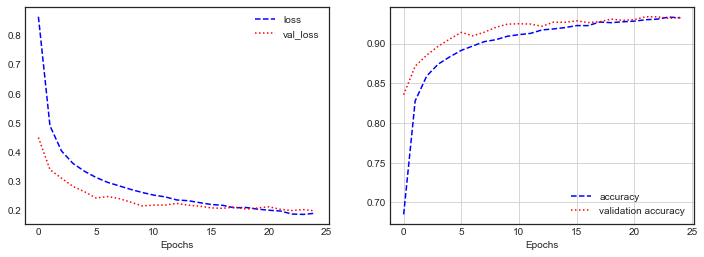

In [53]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(hist_2.history['loss'], 'b--', label='loss')
plt.plot(hist_2.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_2.history['acc'], 'b--', label='accuracy')
plt.plot(hist_2.history['val_acc'], 'r:', label='validation accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [54]:
model_3.evaluate(x_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.1963 - acc: 0.9279


[0.196344792842865, 0.9279000163078308]

#### keras model save and load

In [55]:
model_2.save('thecloset_model.h5') # best model save

In [56]:
thecloset_model = tf.keras.models.load_model('thecloset_model.h5') # load

#### model 평가하기

In [59]:
loss, acc = thecloset_model.evaluate(x_test, y_test, verbose=2)

313/313 - 5s - loss: 0.2095 - acc: 0.9286 - 5s/epoch - 17ms/step


In [60]:
thecloset_model.summary() # model 정보 확인 

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_25 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 13, 13, 128)       73856     
                                                           

In [68]:
# model 아키텍쳐 확인
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot

# %matplotlib inline

# SVG(model_to_dot(thecloset_model, show_shapes=True).create(prog='dot', format='svg'))